In [1]:
# Importing necessary libraries

import pandas as pd
import numpy as np
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns

In [2]:
#Loading boston house price data
boston = load_boston()

In [3]:
#Understanding Boston Dataset
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [4]:
# Let's load it into pandas dataframe
data = pd.DataFrame(boston.data, columns = boston.feature_names)
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [5]:
data.shape

(506, 13)

In [6]:
data.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [7]:
# Printing Statistical summary
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [8]:
#Adding Target feature
data['price'] = boston.target

## EDA:

### Boston house Features vs Price:

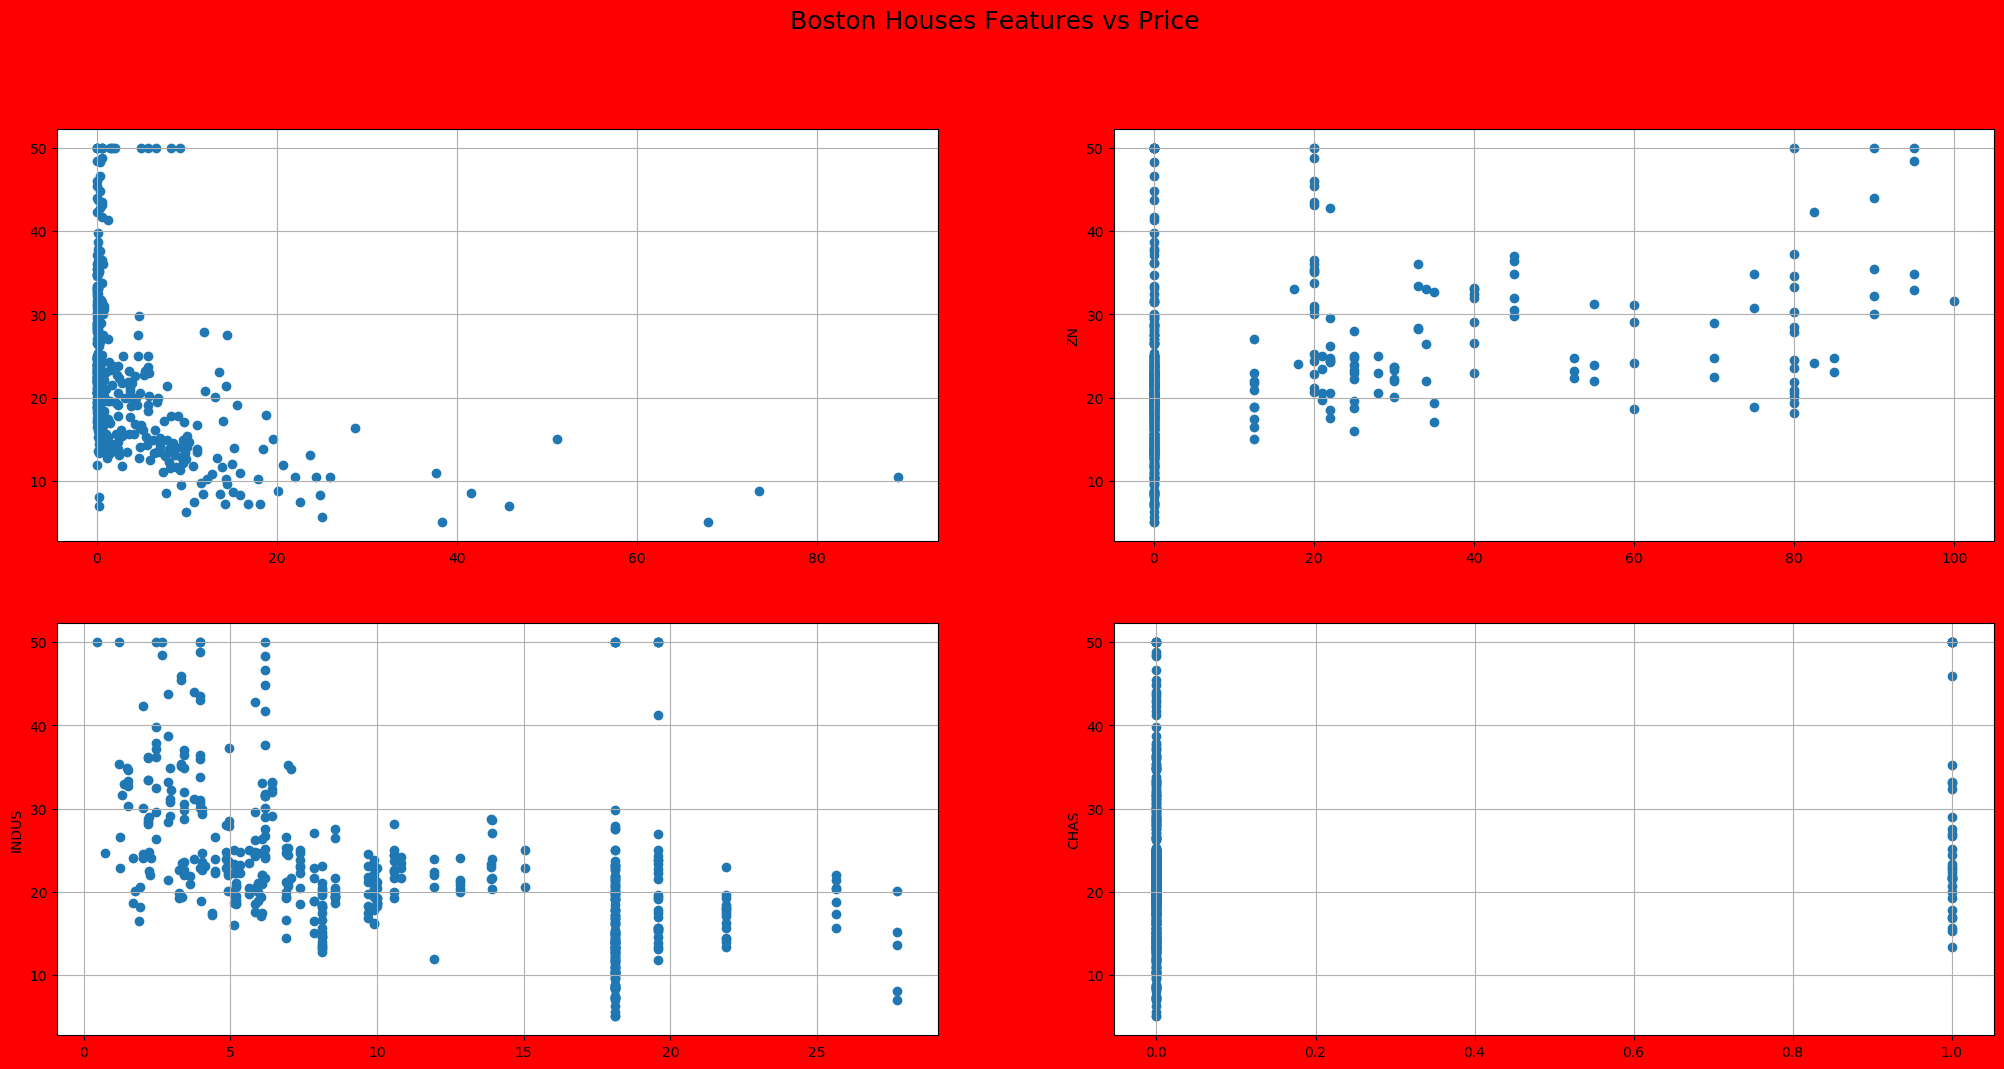

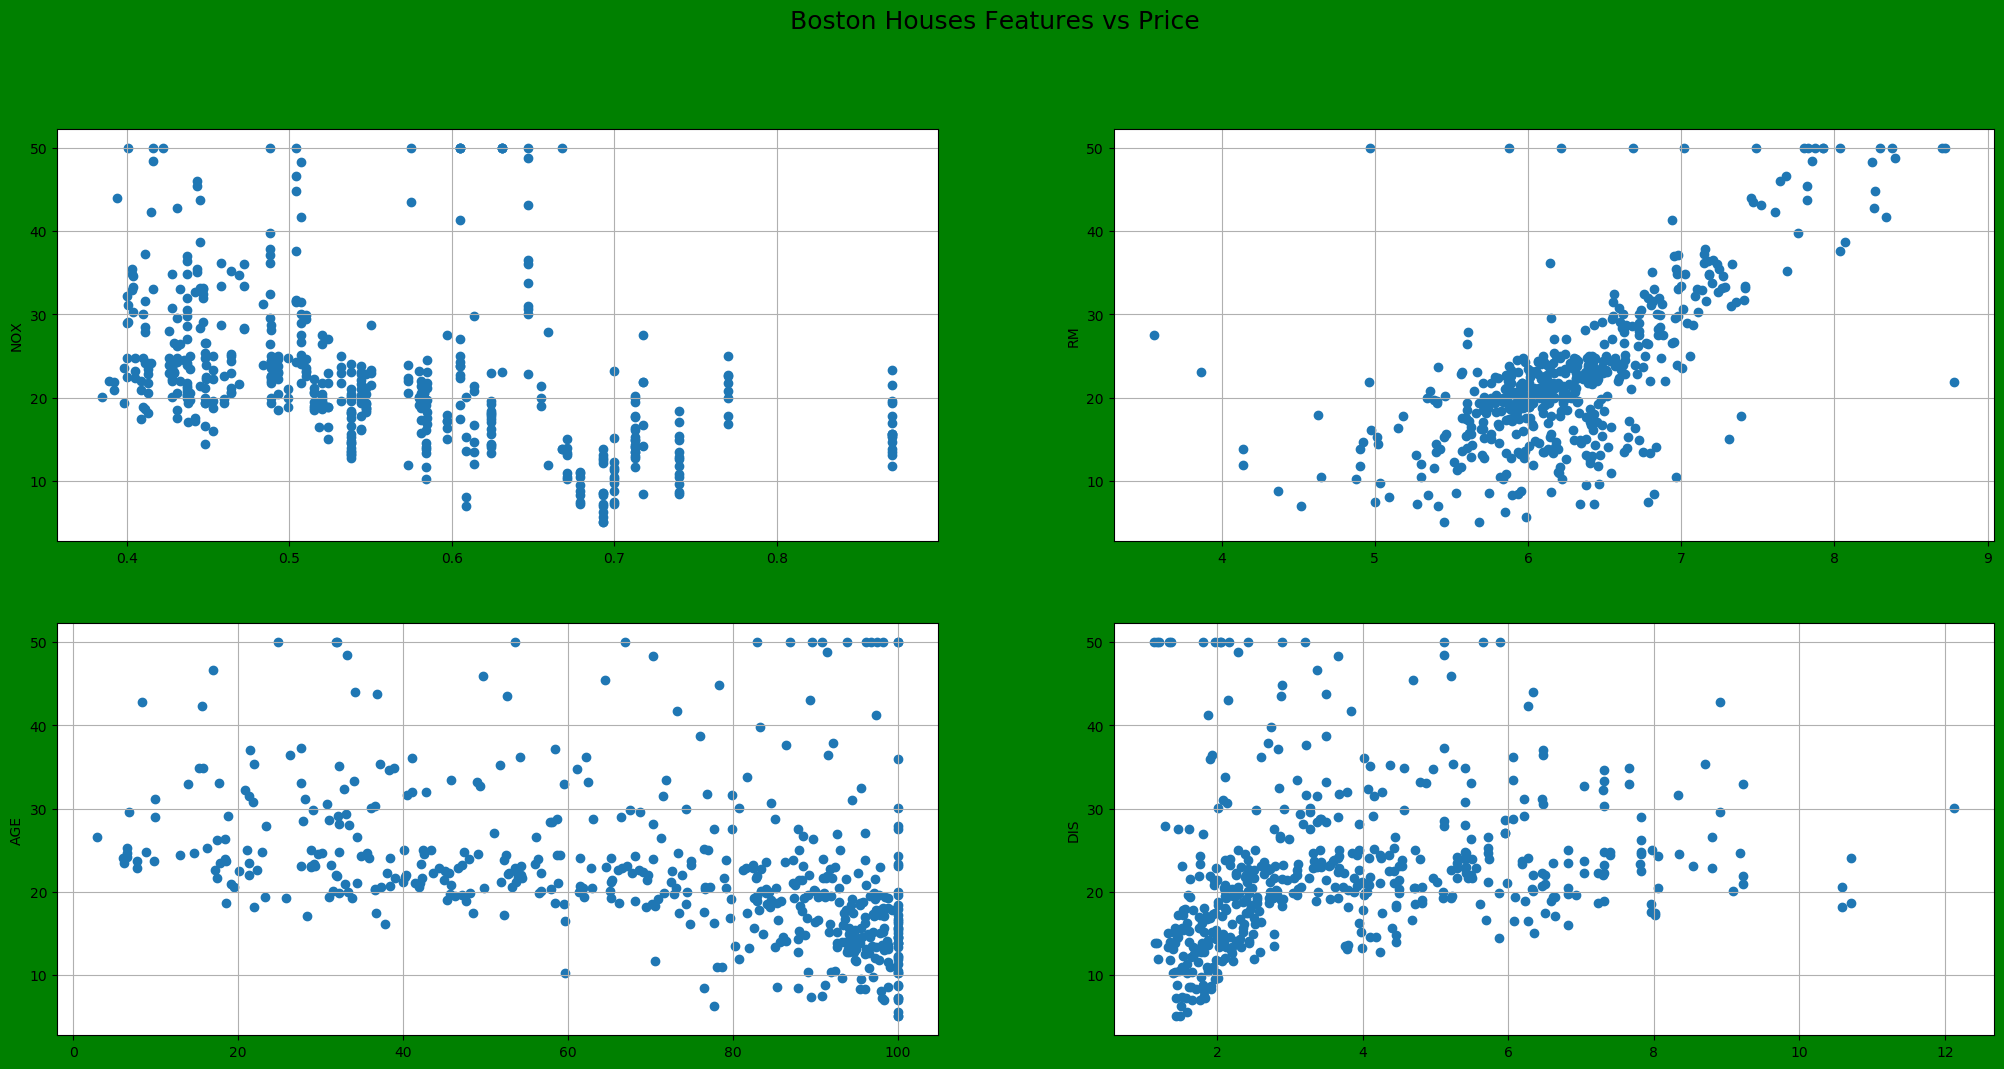

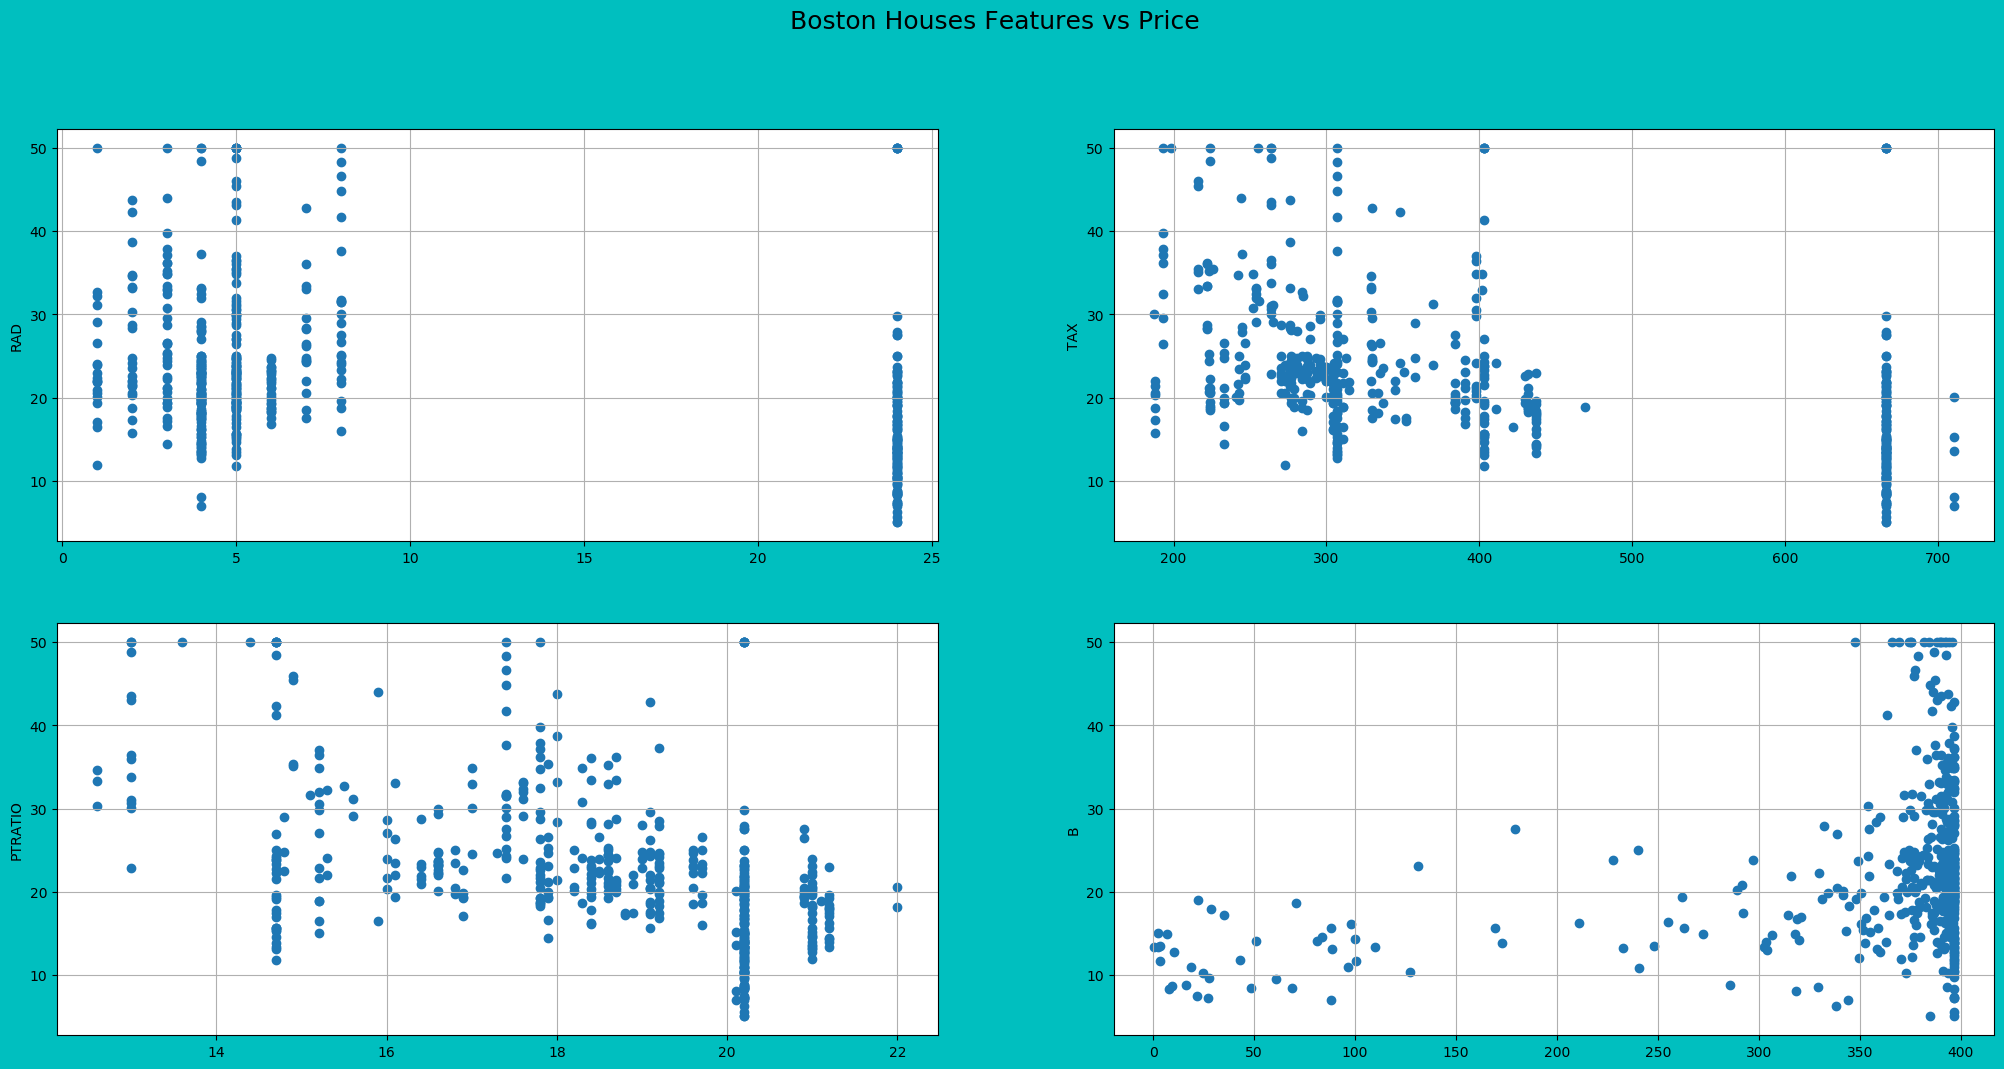

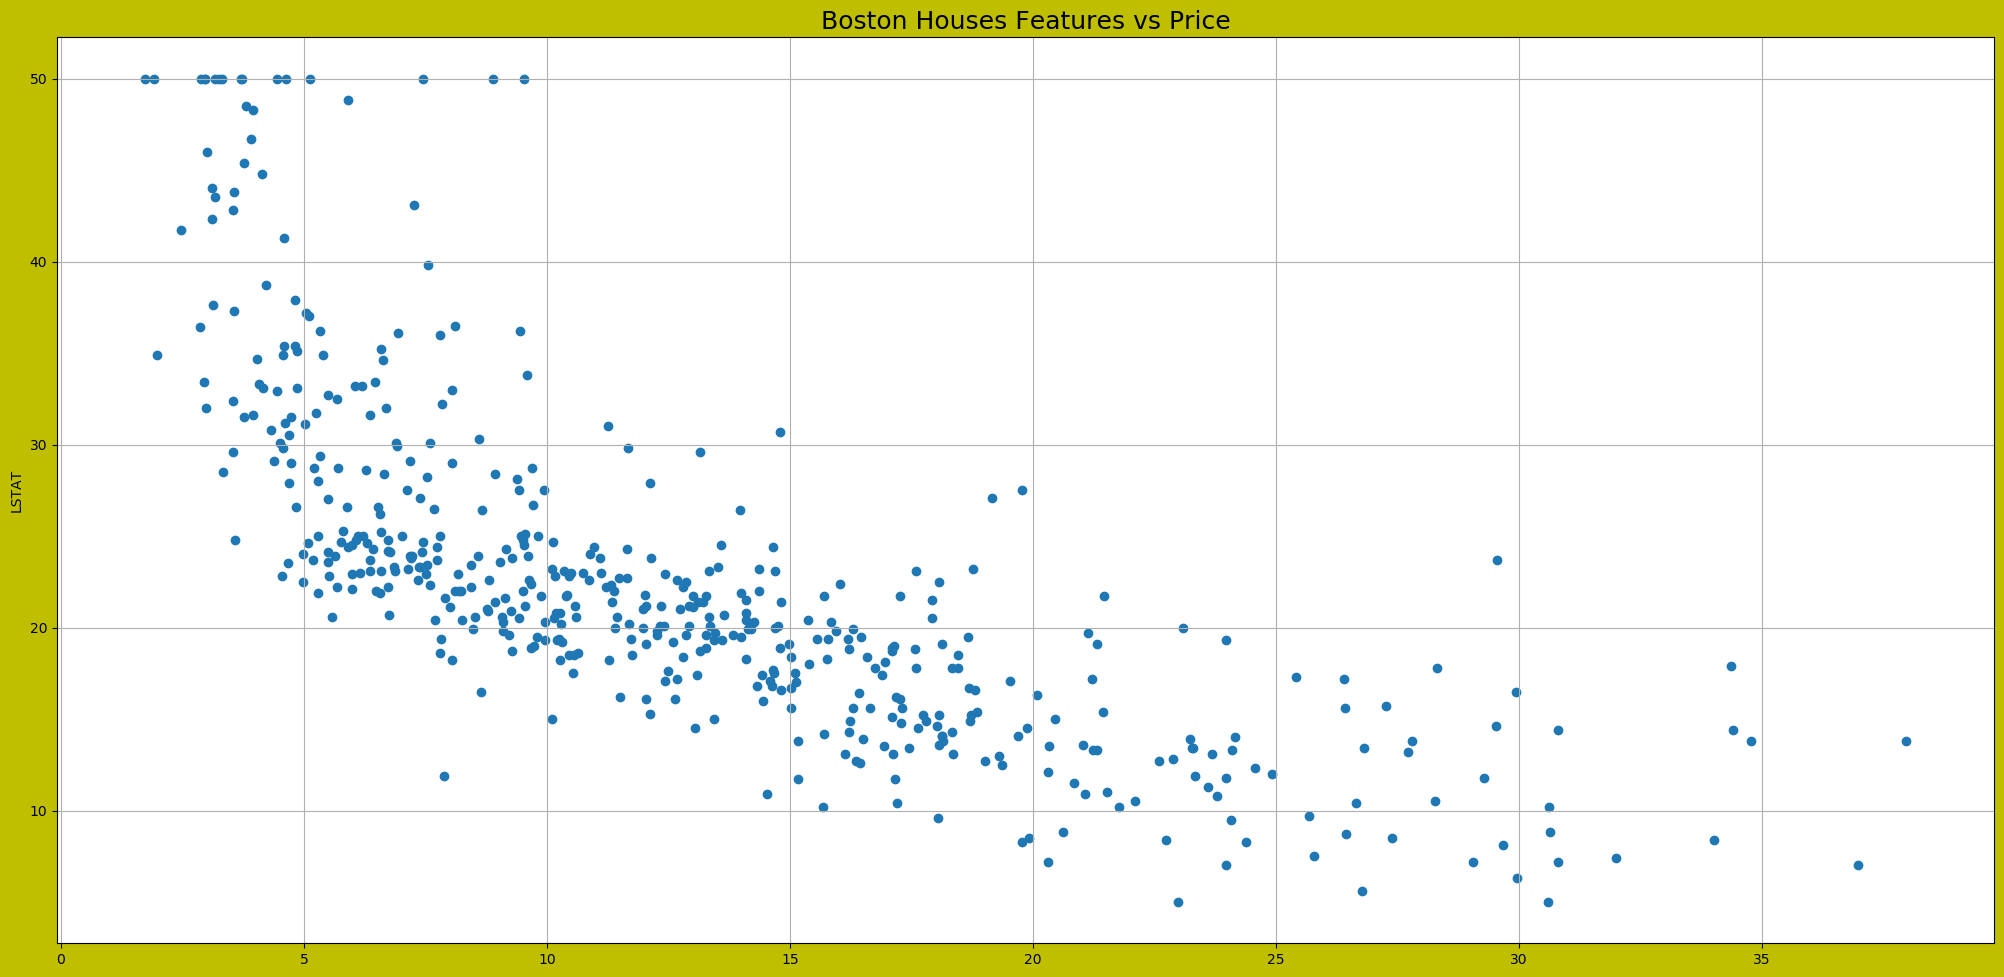

In [9]:
fig = plt.figure(num=None, figsize=(25, 12), dpi=100, facecolor='r', edgecolor='k')
fig.suptitle('Boston Houses Features vs Price', fontsize=18)
ax1 = fig.add_subplot(221)

ax1.scatter(data.CRIM, data.price)
plt.grid()
ax2 = fig.add_subplot(222)
plt.ylabel('CRIM')
ax2.scatter(data.ZN,data.price)
plt.ylabel('ZN')
plt.grid()
ax3 = fig.add_subplot(223)

ax3.scatter(data.INDUS,data.price)
plt.ylabel('INDUS')
plt.grid()
ax4 = fig.add_subplot(224)
ax4.scatter(data.CHAS,data.price)
plt.ylabel('CHAS')
plt.grid()
plt.show()
fig1 = plt.figure(num=None, figsize=(25, 12), dpi=100, facecolor='g', edgecolor='k')
fig1.suptitle('Boston Houses Features vs Price', fontsize=18)
ax5 = fig1.add_subplot(221)
ax5.scatter(data.NOX,data.price)
plt.ylabel('NOX')
plt.grid()
ax6 = fig1.add_subplot(222)
ax6.scatter(data.RM,data.price)
plt.ylabel('RM')
plt.grid()
ax7 = fig1.add_subplot(223)
ax7.scatter(data.AGE,data.price)
plt.ylabel('AGE')
plt.grid()
ax8 = fig1.add_subplot(224)
ax8.scatter(data.DIS,data.price)
plt.ylabel('DIS')
plt.grid()
plt.show()
fig2 = plt.figure(num=None, figsize=(25, 12), dpi=100, facecolor='c', edgecolor='k')
fig2.suptitle('Boston Houses Features vs Price', fontsize=18)
ax9 = fig2.add_subplot(221)
ax9.scatter(data.RAD,data.price)
plt.ylabel('RAD')
plt.grid()
ax10 = fig2.add_subplot(222)
ax10.scatter(data.TAX,data.price)
plt.ylabel('TAX')
plt.grid()
ax11 = fig2.add_subplot(223)
ax11.scatter(data.PTRATIO,data.price)
plt.ylabel('PTRATIO')
plt.grid()
ax12 = fig2.add_subplot(224)
ax12.scatter(data.B,data.price)
plt.ylabel('B')
plt.grid()
fig3 = plt.figure(num=None, figsize=(25, 12), dpi=100, facecolor='y', edgecolor='k')

plt.scatter(data.LSTAT,data.price)
plt.title('Boston Houses Features vs Price', fontsize=18)
plt.ylabel('LSTAT')
plt.grid()
plt.show()

In [10]:
# Data preparation for model building

X = data[data.columns[~data.columns.isin(['price'])]]
y = data['price']

In [11]:
#Splitting data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(404, 13)
(102, 13)
(404,)
(102,)


In [12]:
#Scaling data using StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Own SGD Implementation:

In [13]:
def sgd_predict(values, coordinates):
    res = 0
    for i in range(0, len(coordinates)-1):
        res += values[i] * coordinates[i]
    res += coordinates[len(coordinates)-1]
    return res

In [14]:
def sgd_optimize(x_train, coordinates, y_train, 
                 learning_rate, n_ephochs):
    for i in range(n_ephochs):

        total_error = 0
        for j in range(len(x_train)):
            err = y_train.iloc[j] - sgd_predict(x_train[j], coordinates) 
            total_error += abs(err)
            
            for k in range(len(coordinates)-1):
                coordinates[k] = coordinates[k] \
                                + (learning_rate * err * x_train[j][k]) 
            
            coordinates[len(coordinates)-1] = coordinates[len(coordinates)-1] \
                                            + (learning_rate * err)
        if i % 100 == 0:
            print('Epoch: ', i, 'Error: ', round(total_error,3))
    return coordinates

In [15]:
coordinates = np.random.rand(len(X_train[0])+1)
coordinates = sgd_optimize(X_train, coordinates, y_train, 0.0001, 101)

Epoch:  0 Error:  8867.977
Epoch:  100 Error:  1264.39


In [16]:
train_pred = []
for row in X_train:
    train_pred.append(sgd_predict(row, coordinates))   
    
test_pred = []
for row in X_test:
    test_pred.append(sgd_predict(row, coordinates))

In [17]:
from sklearn.metrics import mean_squared_error

train_mse = mean_squared_error(y_train, train_pred)
test_mse = mean_squared_error(y_test, test_pred)
test_r2 =  r2_score(y_test, test_pred)
print('Mean Square error-Train: ', train_mse)
print('Mean Square error-Test: ', test_mse)
print('Variance score-Test: ', test_r2)

Mean Square error-Train:  23.31177728191987
Mean Square error-Test:  23.583925547508073
Variance score-Test:  0.7613624555395188


In [18]:
performance = []
performance.append(['Regressor', 'Training MSE', 'Testing MSE', 'Variance_Score'])
performance.append(['Own SGD', round(train_mse,2), round(test_mse,2), round(test_r2,2)])

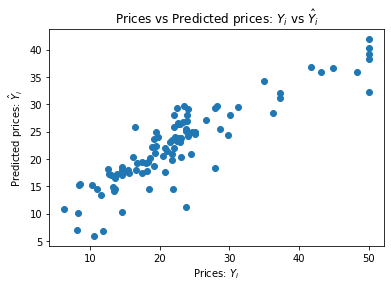

In [19]:
plt.scatter(y_test, test_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")
plt.show()

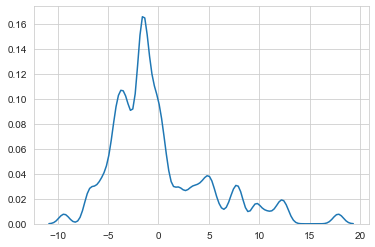

In [20]:
#Ploting error

delta_y = y_test - test_pred

import seaborn as sns;
sns.set_style('whitegrid')
sns.kdeplot(np.array(delta_y), bw=0.5)
plt.show()

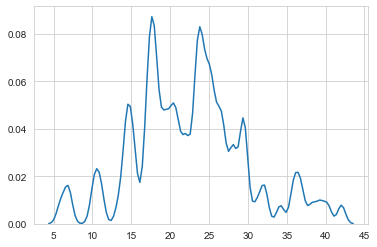

In [21]:
sns.set_style('whitegrid')
sns.kdeplot(np.array(test_pred), bw=0.5)
plt.show()

## Implementing Sklearn's SGD Calssifier:

In [22]:
from sklearn.linear_model import SGDRegressor

clf = SGDRegressor()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("Coefficients: \n", clf.coef_)
print("Y_intercept", clf.intercept_)

Coefficients: 
 [-0.93544285  1.07614658 -0.24158305  0.63441235 -1.92056057  2.26921422
  0.03421202 -2.83022807  1.5995588  -0.85402936 -2.10212273  0.69495299
 -3.86464509]
Y_intercept [22.5156812]


In [23]:
train_mse1 = mean_squared_error(y_train, clf.predict(X_train))
test_mse1 = mean_squared_error(y_test, y_pred)
test_r2_1 = r2_score(y_test, y_pred)
print('Train Mean Square error: ', train_mse1)
print('Test Mean Square error: ', test_mse1)
print('Variance score-Test: ', test_r2_1)

Train Mean Square error:  22.056256949059023
Test Mean Square error:  23.357018429462357
Variance score-Test:  0.7636584497904315


In [24]:
performance.append(['SGD Classifier', round(train_mse1,2), round(test_mse1,2), round(test_r2_1,2)])

## Comparison between implemented SGD and sklearn SGD:

In [25]:
from prettytable import PrettyTable

table = PrettyTable()
table.field_names = ['Regressor', 'Training MSE', 'Testing MSE', 'Variance Score']
for i in range(1,3):
    table.add_row(performance[i])
print(table)

+----------------+--------------+-------------+----------------+
|   Regressor    | Training MSE | Testing MSE | Variance Score |
+----------------+--------------+-------------+----------------+
|    Own SGD     |    23.31     |    23.58    |      0.76      |
| SGD Classifier |    22.06     |    23.36    |      0.76      |
+----------------+--------------+-------------+----------------+


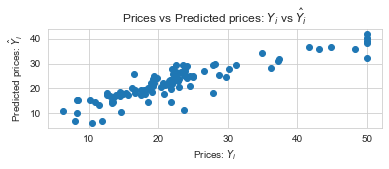

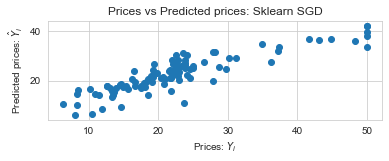

In [26]:
# Scatter plots of test set vs predicted set  for both Own SGD and Sklearn SGD

# Implemented SGD
plt.subplot(212)
plt.scatter(y_test, test_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")
plt.show()


# sklearn SGD
plt.figure(1)
plt.subplot(211)
plt.scatter(y_test, y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: Sklearn SGD")
plt.show()

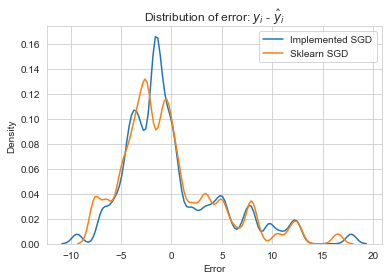

In [27]:
# Distribution of error

delta_y = y_test - test_pred
delta_y_sk = y_test - y_pred

sns.set_style('whitegrid')
sns.kdeplot(np.array(delta_y), label = "Implemented SGD", bw=0.5)
sns.kdeplot(np.array(delta_y_sk), label = "Sklearn SGD", bw = 0.5)
plt.title("Distribution of error: $y_i$ - $\hat{y}_i$")
plt.xlabel("Error")
plt.ylabel("Density")
plt.legend()
plt.show()

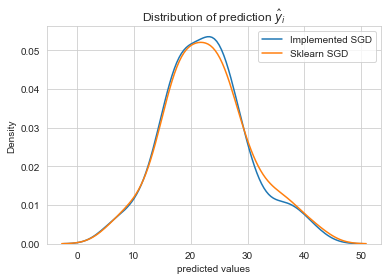

In [28]:
# Distribution of predicted value

sns.set_style('whitegrid')
sns.kdeplot(test_pred, label = "Implemented SGD")
sns.kdeplot(y_pred, label = "Sklearn SGD")
plt.title("Distribution of prediction $\hat{y}_i$")
plt.xlabel("predicted values")
plt.ylabel("Density")
plt.show()

### Observations

1. Coefficient of determination tells about the goodness of fit of a model and for implemented SGD, r-squared score is 0.77 which means regression prediction does not perfectly fit the data in this case. An r-squared error of 1 indicates that regression prediction perfect fit the data.

2. The mean squared error(MSE) for test set is 23.09 in case of own SGD compared to 23.43 in sklearn's SGD classifier which is similar for both cases i.e. there are much more difference b/w predicted and actual points. Hence average squared difference between the actual target value and predicted target value is high.

3. r-squared score for sklearn SGD is 0.76, means the fit explain 76% of the total variation in the data about the average.

4. Distribution of prediction graphs for both the SGDs are overlapping and sklearn SGD graph is smoother compared to own implemented SGD.

### Conclusions

1. While comparing sklearn implemented SGD regressor and own implemented SGD regressor in python, we could not see much of a difference in terms of r-squared error.

2. Overall we can say that regression lines don't fit to the data perfectly in both the cases.